## DayTwo - Data Science Home Assignment

### load data set

In [122]:
import pandas
data = pandas.read_csv("D:\DayTwo_Exercise\movie_metadata.csv")
data.head() # present 5 first rows (for convience), to view the data

,duration,num_voted_users,num_critic_for_reviews,movie_facebook_likes,imdb_score,budget,gross,title_year,director_name,movie_title
0,178.0,886204.0,NaN,33000.0,7.9,NaN,760505847.0,2009.0,James Cameron,Avatar
1,169.0,471220.0,302.0,0.0,NaN,300000000.0,309404152.0,2007.0,Gore Verbinski,Pirates of the Caribbean: At World's End
2,148.0,275868.0,602.0,85000.0,6.8,NaN,200074175.0,2015.0,Sam Mendes,Spectre
3,164.0,1144337.0,813.0,164000.0,8.5,250000000.0,448130642.0,2012.0,Christopher Nolan,The Dark Knight Rises
4,NaN,8.0,NaN,0.0,7.1,NaN,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...


### Learn the data

In [123]:
# amount of movies (sum rows, -1 for not including the heading)
print( '# of movies= ' + repr( len(data)-1 ) )

# amount of Nans in the director name
df = pandas.DataFrame(data)
print( '# of movies without director data= ' + repr( len(df[df.director_name.isnull()]) ) ) 

# amount of directors (sum set of directors, -1 for not including nan')
uniqueDirectorName = set(df.director_name)
print( '# of directors= ' + repr( len(uniqueDirectorName)-1 ) )

# of movies= 5042
# of movies without director data= 601
# of directors= 2249


In [124]:
# find the director of the maximal number of movies
listDirectors = list(df.director_name)
saveNumOfMovies=[]
# find the number of times each uniqueDirectorName ([1:] to eliminate counting Nan director) is mentioned in listDirectors
for item in list(uniqueDirectorName)[1:]:
    temp = float( listDirectors.count(item) )
    saveNumOfMovies.append(temp)

# use numpy to easily find the maximal number of movies for a director 
import numpy    
A = numpy.array(saveNumOfMovies)
maxNumOfMovies = max(saveNumOfMovies)
# find the indices with the maximal num of movies and the relevant director name
maximum_indices = numpy.where(A==maxNumOfMovies)

print( 'The director with the maximal # of movies (' + repr(maxNumOfMovies) + ') is: ' + list(uniqueDirectorName)[numpy.asscalar(numpy.array(maximum_indices))+1] )

The director with the maximal # of movies (24.0) is: Steven Spielberg


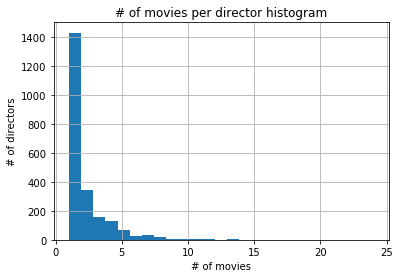

In [5]:
# Plot a histogram of the number of movies per director, to understand how many directors have a high amount of movies 
import matplotlib.pyplot as plt

plt.hist(saveNumOfMovies,bins=25) # 25 bins - 1(the minimal number) up to 24(the maximal # of movies per director)
plt.title("# of movies per director histogram")
plt.ylabel("# of directors")
plt.xlabel("# of movies")
plt.grid(True) # present grid
plt.show()

### Analyze the data to find interesting insights

Analyze the directors of 3 or more movies (significant directors), to see each director's averaged imdb score

In [125]:
# find the numbers which are higher than 3 
moreThan3 = [x for x in saveNumOfMovies if x >= 3]
# find the indexes of the the numbers which are higher than 3
moreThan3_indexes = [index for index, x in enumerate(saveNumOfMovies) if x >= 3]
# add 1 for all indexes, in order to later eliminate the 'nan' in uniqueDirectorName
moreThan3_indexes = [x+1 for x in moreThan3_indexes]

# find the directors' names having more than 3 movies
saveDirectorMoreThan3 = []
for item in moreThan3_indexes:
    temp = (list(uniqueDirectorName)[item])
    saveDirectorMoreThan3.append(temp)

# find the mean imdb score of each director
saveMeanImdb = []
for item in saveDirectorMoreThan3:
    temp = [i for i,x in enumerate(listDirectors) if x == item]
    imdbsDirector = numpy.array(df.imdb_score[temp])
    temp2 = numpy.NaN if numpy.all(imdbsDirector!=imdbsDirector) else numpy.nanmean(imdbsDirector) # avoid nans
    saveMeanImdb.append(temp2)

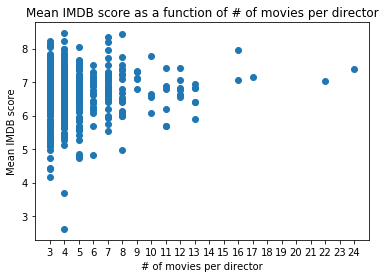

In [126]:
# plot the results
plt.scatter(moreThan3,saveMeanImdb)
plt.xticks(range(3,25))
plt.title("Mean IMDB score as a function of # of movies per director")
plt.ylabel("Mean IMDB score")
plt.xlabel("# of movies per director")
plt.show()

The 5 directors on the top right have the highest imdb score compared to the number of movies directed by them.
Moreover, it is possible to see some correlation between the number of movies directed and the mean IMDB score. 

In [127]:
# find the numbers which are higher than 15 
moreThan15 = [x for x in saveNumOfMovies if x >= 15]
# find the indexes of the the numbers which are higher than 15
moreThan15_indexes = [index for index, x in enumerate(saveNumOfMovies) if x >= 15]
# add 1 for all indexes, in order to later eliminate the 'nan' in uniqueDirectorName
moreThan15_indexes = [x+1 for x in moreThan15_indexes]

# find the directors' names having more than 3 movies
saveDirectorMoreThan15 = []
for item in moreThan15_indexes:
    temp = (list(uniqueDirectorName)[item])
    saveDirectorMoreThan15.append(temp)
    
# find the mean imdb score of each director
saveMeanImdb15 = []
for item in saveDirectorMoreThan15:
    temp = [i for i,x in enumerate(listDirectors) if x == item]
    imdbsDirector = numpy.array(df.imdb_score[temp])
    temp2 = numpy.NaN if numpy.all(imdbsDirector!=imdbsDirector) else numpy.nanmean(imdbsDirector) # avoid nans
    saveMeanImdb15.append(temp2)
# print insights
print('The best directors are: ')
print(saveDirectorMoreThan15)
print('# of movies per director (respectively): ')
print(moreThan15)
print('Mean IMDB score (respectively): ')
print(numpy.around(saveMeanImdb15,decimals=2))

The best directors are: 
['Steven Spielberg', 'Martin Scorsese', 'Woody Allen', 'Ridley Scott', 'Clint Eastwood']
# of movies per director (respectively): 
[24.0, 16.0, 22.0, 16.0, 17.0]
Mean IMDB score (respectively): 
[ 7.4   7.95  7.04  7.07  7.15]


Try to predict the IMDB score (response) according to all given predictors via a classic regression decision tree (since data is not categorical).
Many different classifires and predictors' transformatins may be examined, in order to achieve the model with the best accuracy. 

Predictors are: duration, # voted users, # critic for reviews, movie facebook likes, budget, gross and year

In [128]:
import sklearn
from sklearn.preprocessing import Imputer

# copy 'data' so we can manipulate it
data2 = data.copy() 
# remove all rows that their IMDB score (response) is nan
data2 = data2[pandas.notnull(data2['imdb_score'])]

# replace all nan values by the averaged value of the predictor (to keep the data). 
## other strategies such as median should be examined
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
## fit -caculates means, transform -adds them instead of nans
df2 = pandas.DataFrame(data2)
df2[['duration','num_voted_users','num_critic_for_reviews','movie_facebook_likes','budget','gross','title_year']] = imputer.fit_transform(df2[['duration','num_voted_users','num_critic_for_reviews','movie_facebook_likes','budget','gross','title_year']])
df2.head() # present 5 first rows

predictors = df2[['duration','num_voted_users','num_critic_for_reviews','movie_facebook_likes','budget','gross','title_year']]

In [129]:
# train model on all data, for example
# in order to achieve reliable insights there are two options:
## a random spliting of the data in order to present 'training' and 'test' sets
## few-folds cross-validation in order to validate the model
from sklearn import tree
X = numpy.array([predictors.values])[0]
Y = numpy.array([df2['imdb_score'].values])[0]
# a regressor tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,Y)